In [7]:
import pandas as pd

full_data = pd.read_csv(r'cleaning\Urson\data_restructured_final.csv.csv')

# (2) Function to remove outliers based on the Price column using the IQR method
def remove_outliers(dataframe, column='Price'):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dataframe[column].quantile(0.25)  # First quartile (25% of the data)
    Q3 = dataframe[column].quantile(0.75)  # Third quartile (75% of the data)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1  
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the dataframe with outliers removed
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# (3) Creating separate dataframes for houses and apartments
house_df = full_data[full_data['PropertySubtype'] == 'HOUSE']
apartments_df = full_data[full_data['PropertySubtype'] == 'APARTMENT']

# (4) Removing outliers for each dataframe separately, based on the Price column
house_df_without_outliers = remove_outliers(house_df, 'Price')
apartments_df_without_outliers = remove_outliers(apartments_df, 'Price')

# (5) Combining houses and apartments without outliers into one dataframe
full_data_without_outliers = pd.concat([house_df_without_outliers, apartments_df_without_outliers])

# Displaying the shapes of each DataFrame for comparison
print("Shape of Original Full Data:", full_data.shape)
print("Shape of Houses DataFrame (with outliers):", house_df.shape)
print("Shape of Apartments DataFrame (with outliers):", apartments_df.shape)
print("Shape of Houses DataFrame (without outliers):", house_df_without_outliers.shape)
print("Shape of Apartments DataFrame (without outliers):", apartments_df_without_outliers.shape)
print("Shape of Full Data without Outliers:", full_data_without_outliers.shape)

# Displaying preview of each DataFrame to check the data
print("\nFull Data Preview:\n", full_data.head())
print("\nHouses DataFrame without Outliers Preview:\n", house_df_without_outliers.head())
print("\nApartments DataFrame without Outliers Preview:\n", apartments_df_without_outliers.head())


Shape of Original Full Data: (5717, 32)
Shape of Houses DataFrame (with outliers): (1946, 32)
Shape of Apartments DataFrame (with outliers): (2264, 32)
Shape of Houses DataFrame (without outliers): (1844, 32)
Shape of Apartments DataFrame (without outliers): (2099, 32)
Shape of Full Data without Outliers: (3943, 32)

Full Data Preview:
    Property ID    Region  Province  District   Locality  PostalCode  \
0     20226645  Brussels  Brussels  Brussels  Bruxelles        1000   
1     20226901  Brussels  Brussels  Brussels  Bruxelles        1000   
2     20213509  Brussels  Brussels  Brussels  Bruxelles        1000   
3     10900870  Brussels  Brussels  Brussels  Bruxelles        1000   
4     20215364  Brussels  Brussels  Brussels  Bruxelles        1000   

               Street    Price PropertyType PropertySubtype  ...  \
0            Hooikaai   455000    APARTMENT       APARTMENT  ...   
1  Baron de Vironlaan   880000        HOUSE           HOUSE  ...   
2  Avenue Michel Ange  1175000

# GRAPHS #

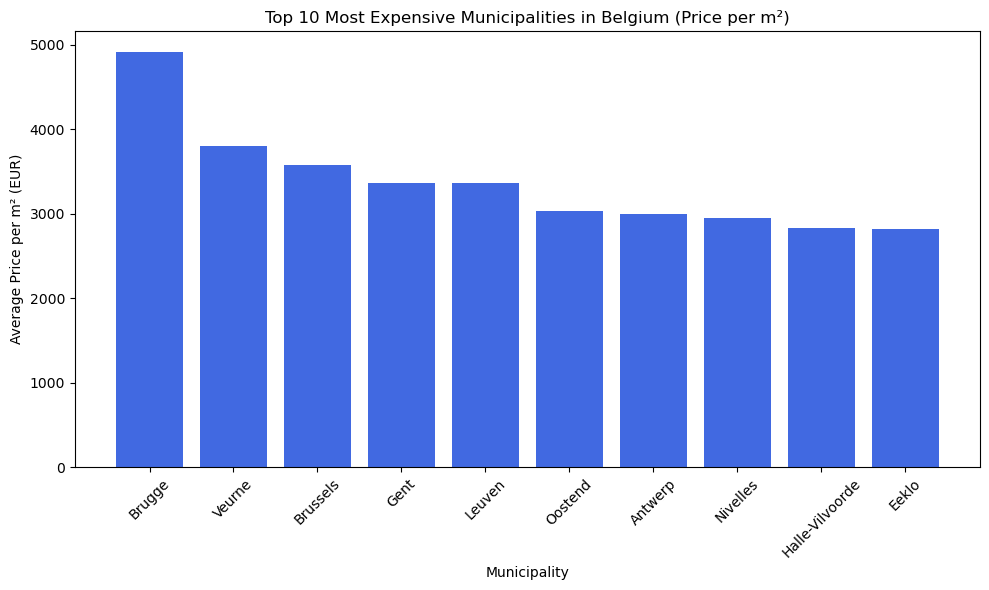

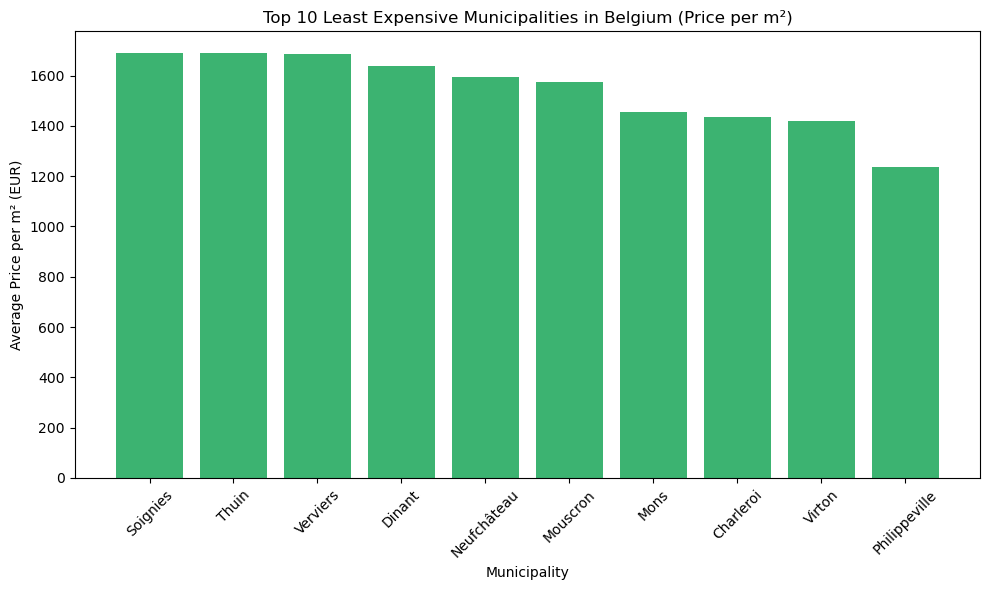

In [11]:
full_data['Price'] = full_data['Price'].astype('int64')

# Recalculate price per square meter
full_data['Price_per_m2'] = full_data['Price'] / full_data['LivingArea']

# Group the full_data by 'District'
municipality_stats = full_data.groupby('District').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Reset index for 'District'
municipality_stats = municipality_stats.reset_index()

# Format the price as integers without scientific notation when displaying
municipality_stats['avg_price'] = municipality_stats['avg_price'].astype(int)
municipality_stats['median_price'] = municipality_stats['median_price'].astype(int)

# Extract the top 10 most expensive and least expensive municipalities
most_expensive_belgium = municipality_stats.head(10)
least_expensive_belgium = municipality_stats.tail(10)

# Plot for most expensive municipalities
plt.figure(figsize=(10, 6))
plt.bar(most_expensive_belgium['District'], most_expensive_belgium['avg_price_per_m2'], color='royalblue')
plt.title('Top 10 Most Expensive Municipalities in Belgium (Price per m²)')
plt.ylabel('Average Price per m² (EUR)')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for least expensive municipalities
plt.figure(figsize=(10, 6))
plt.bar(least_expensive_belgium['District'], least_expensive_belgium['avg_price_per_m2'], color='mediumseagreen')
plt.title('Top 10 Least Expensive Municipalities in Belgium (Price per m²)')
plt.ylabel('Average Price per m² (EUR)')
plt.xlabel('Municipality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


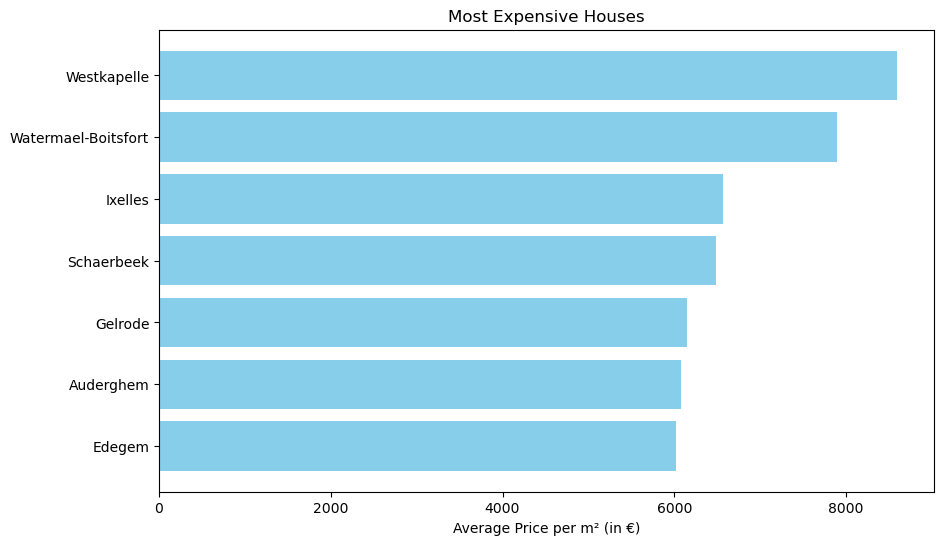

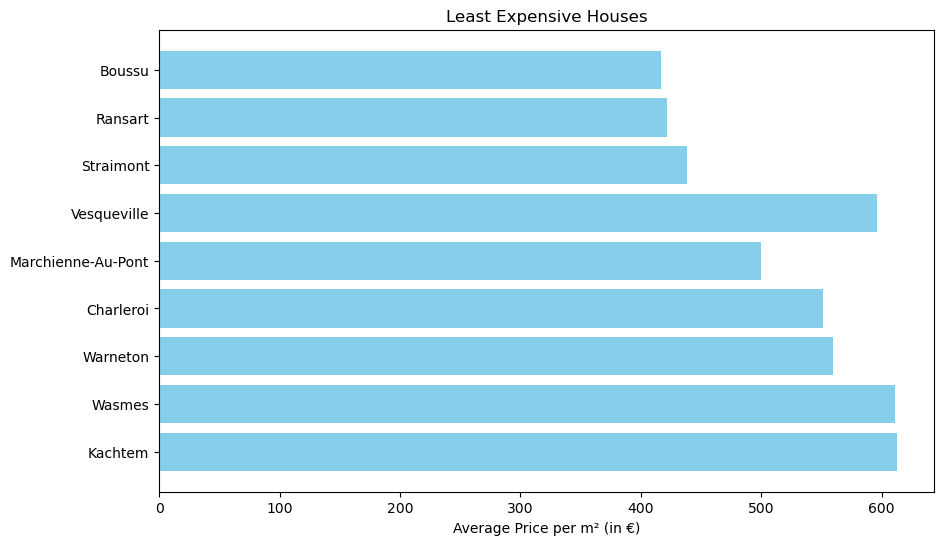

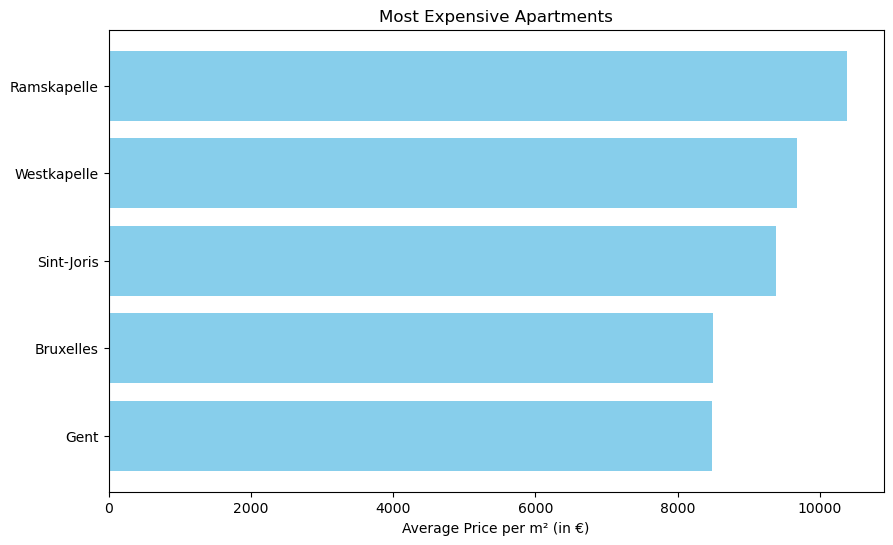

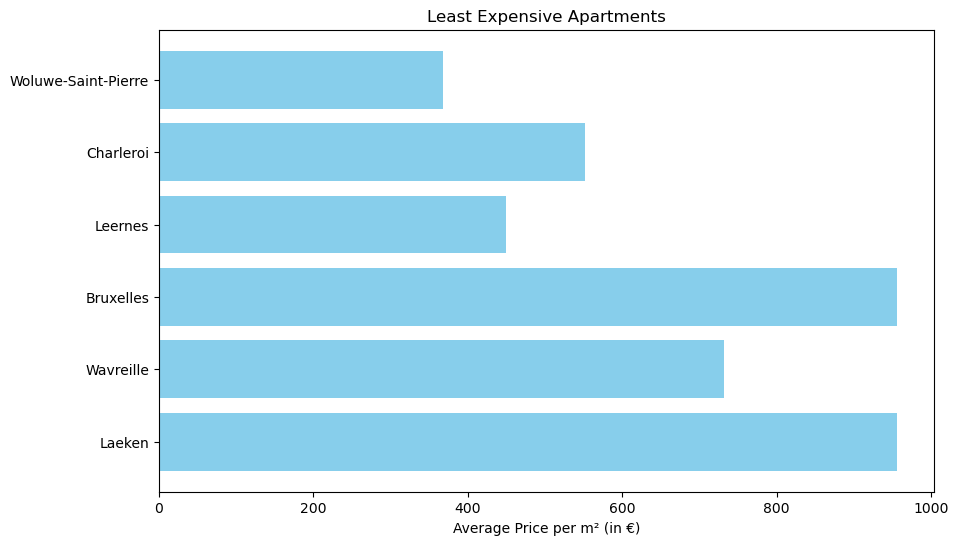

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Function to remove outliers from a specific dataframe based on a column
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# (2) Function to create separate dataframes for houses and apartments
def split_by_property_subtype(data):
    houses = data[data['PropertySubtype'].str.contains('house', case=False, na=False)]
    apartments = data[data['PropertySubtype'].str.contains('apartment', case=False, na=False)]
    return houses, apartments

# (3) Function to remove outliers for houses and apartments based on the 'Price' column
def process_outliers_for_subtypes(data):
    houses, apartments = split_by_property_subtype(data)
    
    # Removing outliers for each dataframe
    houses_no_outliers = remove_outliers(houses, 'Price')
    apartments_no_outliers = remove_outliers(apartments, 'Price')
    
    return houses_no_outliers, apartments_no_outliers

# (4) Function to calculate price per square meter
def calculate_price_per_m2(data):
    data['avg_price_per_m2'] = data['Price'] / data['LivingArea']
    return data

# (5) Function to plot the top 10 most and least expensive municipalities
def plot_most_least_expensive(df, title, ascending=True):
    df_sorted = df.sort_values(by="avg_price_per_m2", ascending=ascending).head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['Locality'], df_sorted['avg_price_per_m2'], color='skyblue')
    plt.xlabel('Average Price per m² (in €)')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
    plt.show()

# (6) Function to plot both houses and apartments for most and least expensive
def plot_processed_data(houses_no_outliers, apartments_no_outliers):
    # Ensure price per m² is calculated
    houses_data = calculate_price_per_m2(houses_no_outliers)
    apartments_data = calculate_price_per_m2(apartments_no_outliers)

    # Plotting the most and least expensive houses
    plot_most_least_expensive(houses_data, 'Most Expensive Houses', ascending=False)
    plot_most_least_expensive(houses_data, 'Least Expensive Houses', ascending=True)
    
    # Plotting the most and least expensive apartments
    plot_most_least_expensive(apartments_data, 'Most Expensive Apartments', ascending=False)
    plot_most_least_expensive(apartments_data, 'Least Expensive Apartments', ascending=True)

# (7) Load the dataset
data = pd.read_csv(r'cleaning\Urson\data_restructured_final.csv.csv')

# (8) Process outliers for houses and apartments
houses_no_outliers, apartments_no_outliers = process_outliers_for_subtypes(data)

# (9) Plot the processed data for houses and apartments
plot_processed_data(houses_no_outliers, apartments_no_outliers)


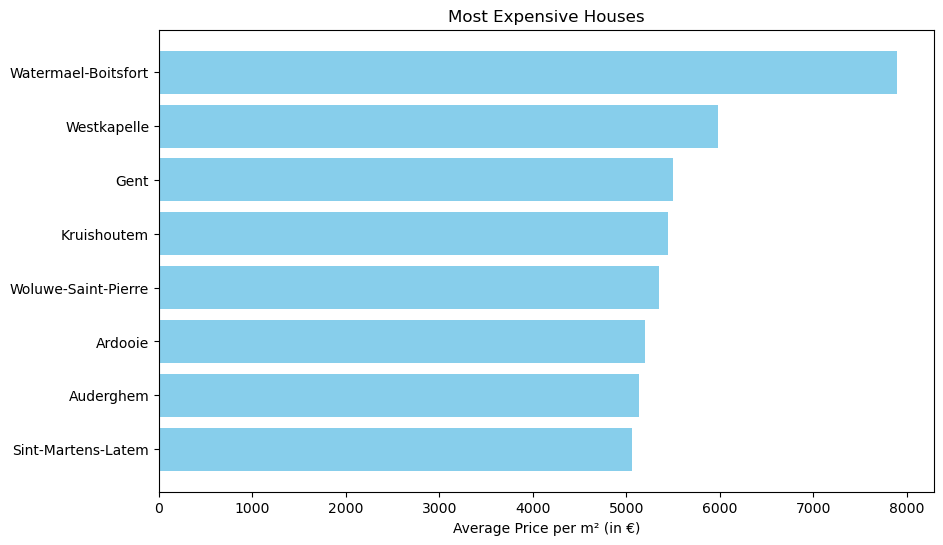

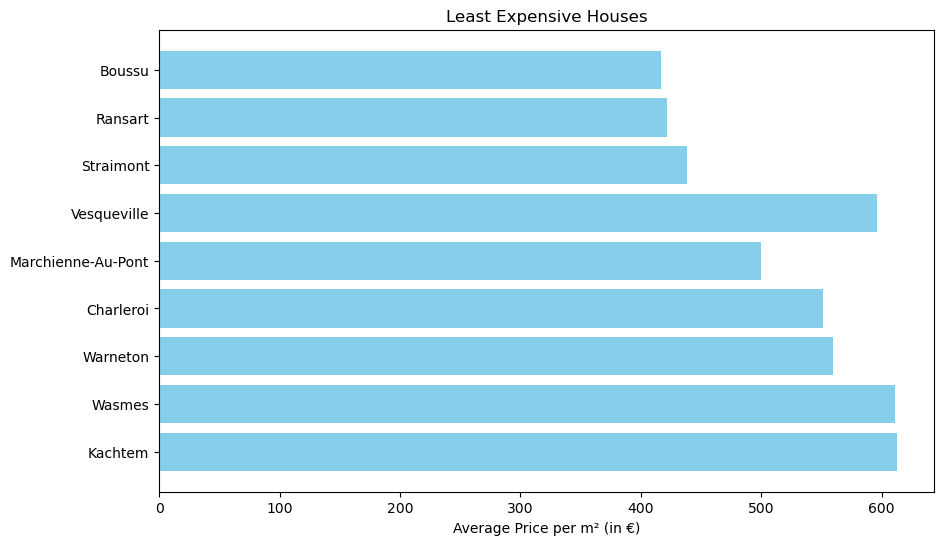

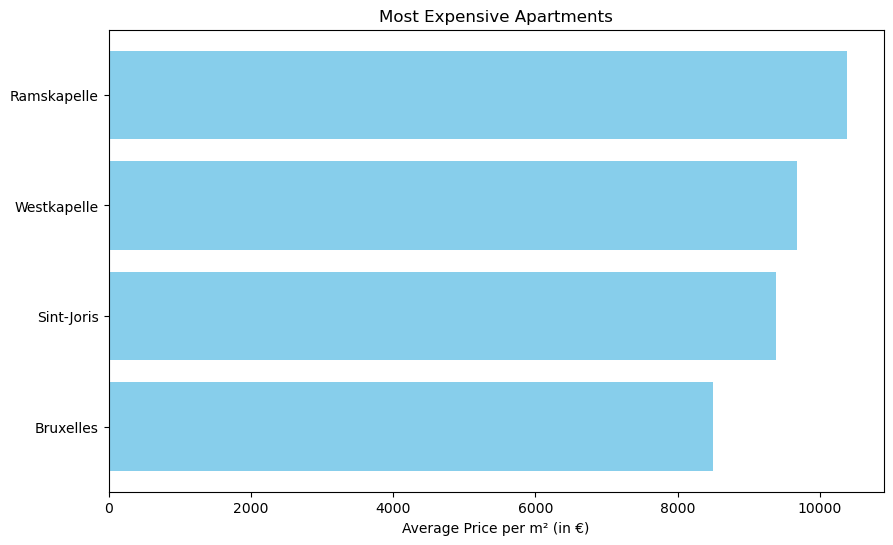

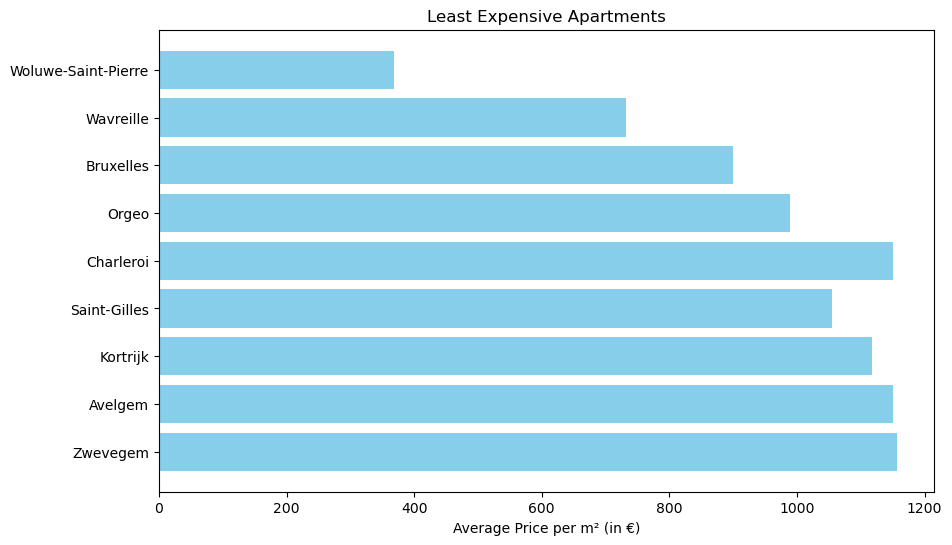

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Function to remove outliers from a specific dataframe based on a column
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# (2) Function to filter only houses and apartments
def filter_houses_apartments(data):
    houses = data[data['PropertySubtype'] == 'HOUSE']
    apartments = data[data['PropertySubtype'] == 'APARTMENT']
    return houses, apartments

# (3) Function to remove outliers for houses and apartments based on the 'Price' column
def process_outliers_for_subtypes(data):
    houses, apartments = filter_houses_apartments(data)
    
    # Removing outliers for each dataframe
    houses_no_outliers = remove_outliers(houses, 'Price')
    apartments_no_outliers = remove_outliers(apartments, 'Price')
    
    return houses_no_outliers, apartments_no_outliers

# (4) Function to calculate price per square meter
def calculate_price_per_m2(data):
    data['avg_price_per_m2'] = data['Price'] / data['LivingArea']
    return data

# (5) Function to plot the top 10 most and least expensive municipalities
def plot_most_least_expensive(df, title, ascending=True):
    df_sorted = df.sort_values(by="avg_price_per_m2", ascending=ascending).head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['Locality'], df_sorted['avg_price_per_m2'], color='skyblue')
    plt.xlabel('Average Price per m² (in €)')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
    plt.show()

# (6) Function to plot both houses and apartments for most and least expensive
def plot_processed_data(houses_no_outliers, apartments_no_outliers):
    # Ensure price per m² is calculated
    houses_data = calculate_price_per_m2(houses_no_outliers)
    apartments_data = calculate_price_per_m2(apartments_no_outliers)

    # Plotting the most and least expensive houses
    plot_most_least_expensive(houses_data, 'Most Expensive Houses', ascending=False)
    plot_most_least_expensive(houses_data, 'Least Expensive Houses', ascending=True)
    
    # Plotting the most and least expensive apartments
    plot_most_least_expensive(apartments_data, 'Most Expensive Apartments', ascending=False)
    plot_most_least_expensive(apartments_data, 'Least Expensive Apartments', ascending=True)

# (7) Load the dataset
data = pd.read_csv(r'cleaning\Urson\data_restructured_final.csv.csv')

# (8) Process outliers for houses and apartments
houses_no_outliers, apartments_no_outliers = process_outliers_for_subtypes(data)

# (9) Plot the processed data for houses and apartments
plot_processed_data(houses_no_outliers, apartments_no_outliers)


       Region         Province  District               Locality  \
0    Brussels         Brussels  Brussels             Anderlecht   
1    Brussels         Brussels  Brussels              Auderghem   
2    Brussels         Brussels  Brussels  Berchem-Sainte-Agathe   
3    Brussels         Brussels  Brussels              Bruxelles   
4    Brussels         Brussels  Brussels              Etterbeek   
..        ...              ...       ...                    ...   
579  Wallonie  Walloon Brabant  Nivelles       Villers-La-Ville   
580  Wallonie  Walloon Brabant  Nivelles     Walhain-Saint-Paul   
581  Wallonie  Walloon Brabant  Nivelles               Waterloo   
582  Wallonie  Walloon Brabant  Nivelles                  Wavre   
583  Wallonie  Walloon Brabant  Nivelles           Zétrud-Lumay   

     Average_price  Median_price_per_sqm  Average_price_per_sqm  \
0         327447.0                2772.0                 2850.0   
1         498756.0                3917.0                 4165

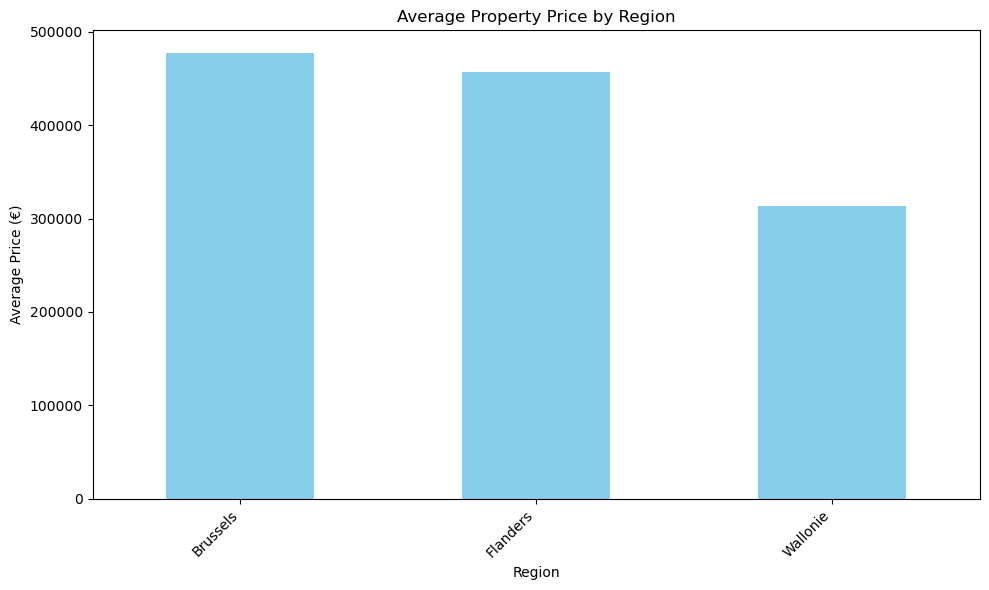

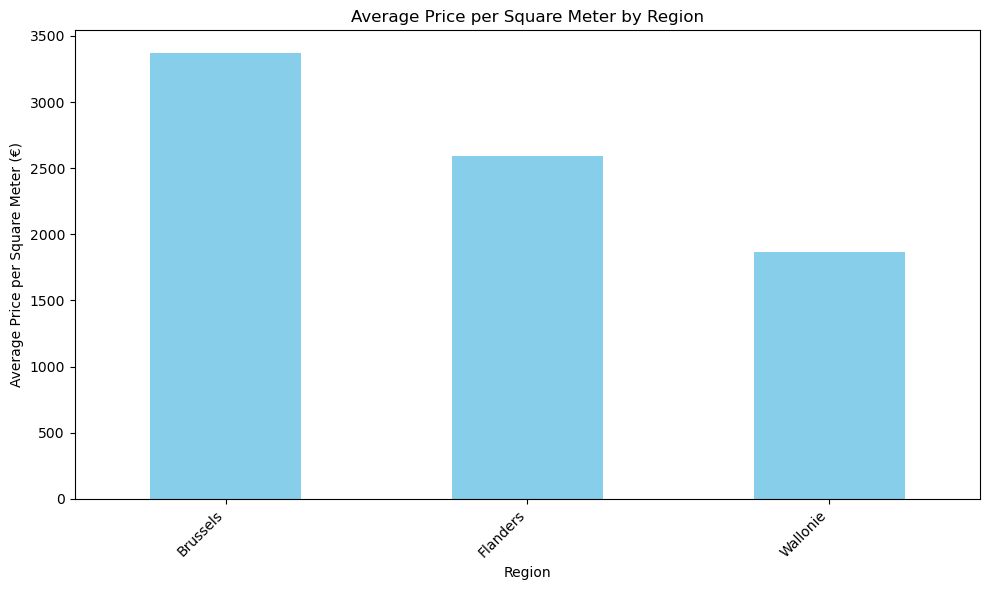

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full_dataset

# Clean and prepare the full_data
full_data['Price'] = pd.to_numeric(full_data['Price'], errors='coerce')
full_data['LivingArea'] = pd.to_numeric(full_data['LivingArea'], errors='coerce')

# Remove rows with missing or zero LivingArea or Price values
full_data_cleaned = full_data.dropna(subset=['Price', 'LivingArea'])
full_data_cleaned = full_data_cleaned[full_data_cleaned['LivingArea'] > 0]

# Calculate price per square meter
full_data_cleaned['Price_per_sqm'] = full_data_cleaned['Price'] / full_data_cleaned['LivingArea']

# Group by Region, Province, District, and Locality and calculate the required statistics
grouped_stats = full_data_cleaned.groupby(['Region', 'Province', 'District', 'Locality']).agg(
    Average_price=('Price', 'mean'),
    Median_price_per_sqm=('Price_per_sqm', 'median'),
    Average_price_per_sqm=('Price_per_sqm', 'mean'),
    Std_price=('Price', 'std'),
    Std_price_per_sqm=('Price_per_sqm', 'std')
).reset_index()

# Round the values for better readability
grouped_stats['Average_price'] = grouped_stats['Average_price'].round(0)
grouped_stats['Median_price_per_sqm'] = grouped_stats['Median_price_per_sqm'].round(0)
grouped_stats['Average_price_per_sqm'] = grouped_stats['Average_price_per_sqm'].round(0)

# Show the table
print(grouped_stats)

# Plotting: Average price vs Region
plt.figure(figsize=(10, 6))
avg_price_by_region = grouped_stats.groupby('Region')['Average_price'].mean()
avg_price_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Property Price by Region')
plt.ylabel('Average Price (€)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting: Average price per square meter vs Region
plt.figure(figsize=(10, 6))
avg_price_per_sqm_by_region = grouped_stats.groupby('Region')['Average_price_per_sqm'].mean()
avg_price_per_sqm_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Price per Square Meter by Region')
plt.ylabel('Average Price per Square Meter (€)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_9828\3740188999.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=municipality_stats, x='Province', y='avg_price_per_m2', palette='coolwarm')


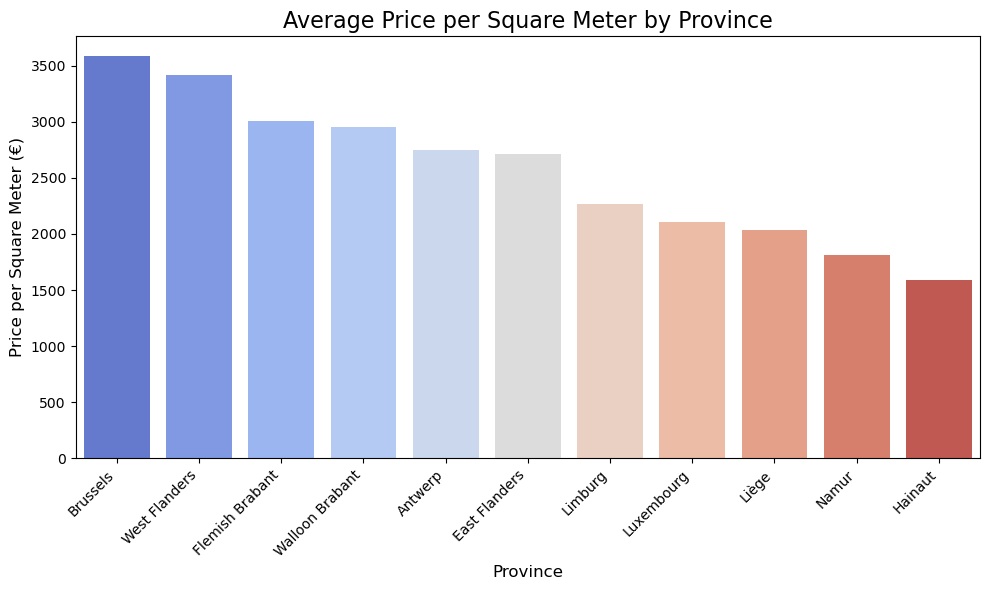

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


data['Price_per_m2'] = data['Price'] / data['LivingArea']

data = data.dropna(subset=['Price', 'LivingArea'])  
data = data[data['LivingArea'] > 0]  # Living Area >= 0 as you do a division with it


municipality_stats = data.groupby('Province').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Reset index to convert 'Province' from the index to keep df !!!
municipality_stats = municipality_stats.reset_index()

# Plot the average price per square meter by province
plt.figure(figsize=(10, 6))
sns.barplot(data=municipality_stats, x='Province', y='avg_price_per_m2', palette='coolwarm')

plt.title('Average Price per Square Meter by Province', fontsize=16)
plt.ylabel('Price per Square Meter (€)', fontsize=12)
plt.xlabel('Province', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_9828\935270996.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cheapest_localities = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Average_price_per_sqm')).reset_index(drop=True)
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_9828\935270996.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_expensive_localities = df.groupby('Region').appl

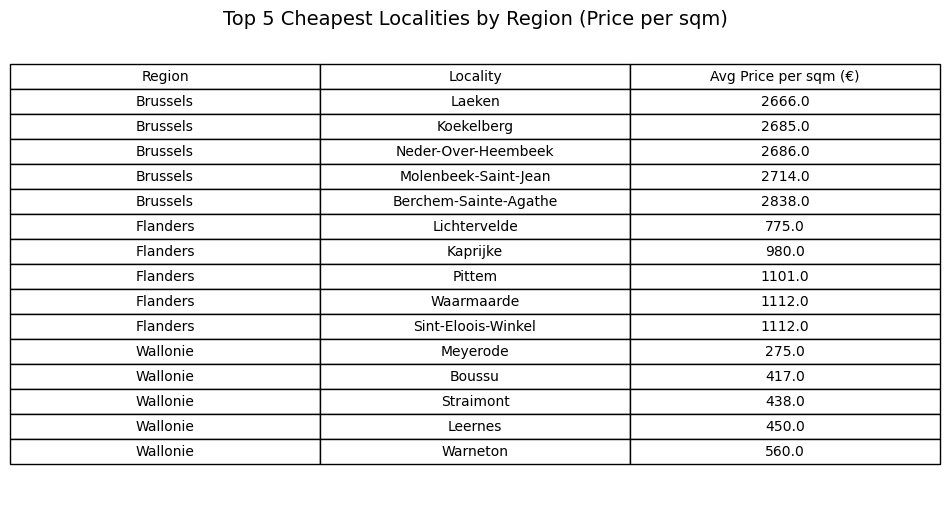

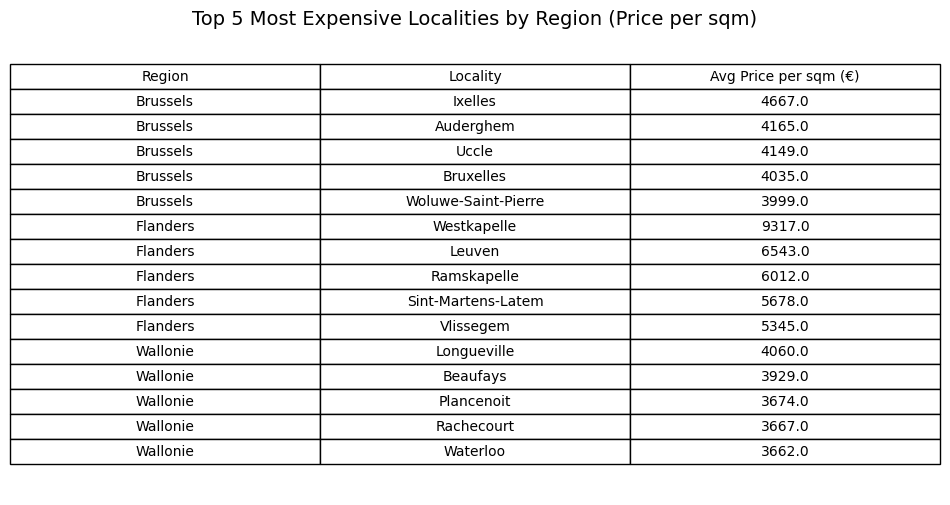

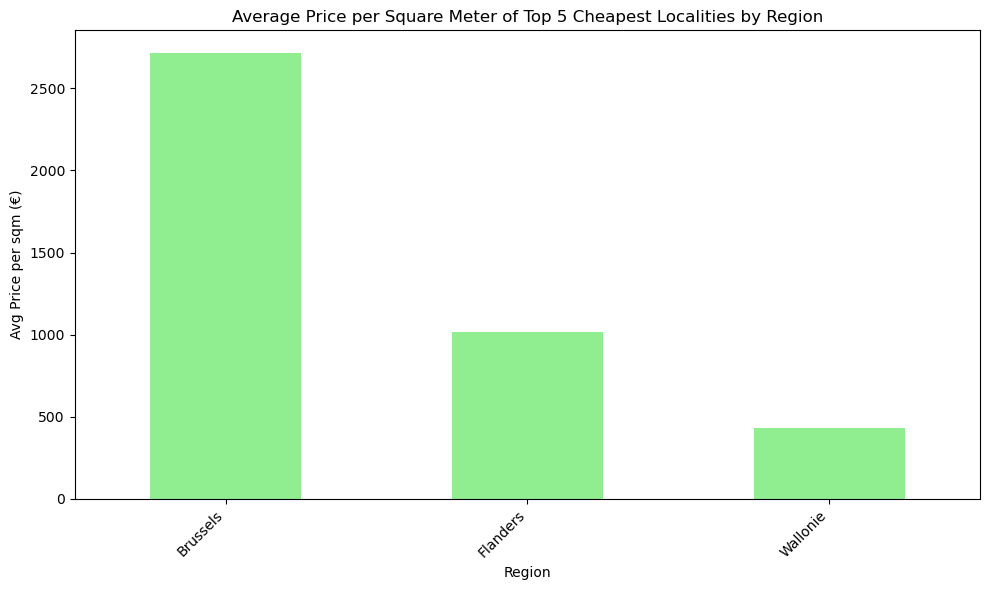

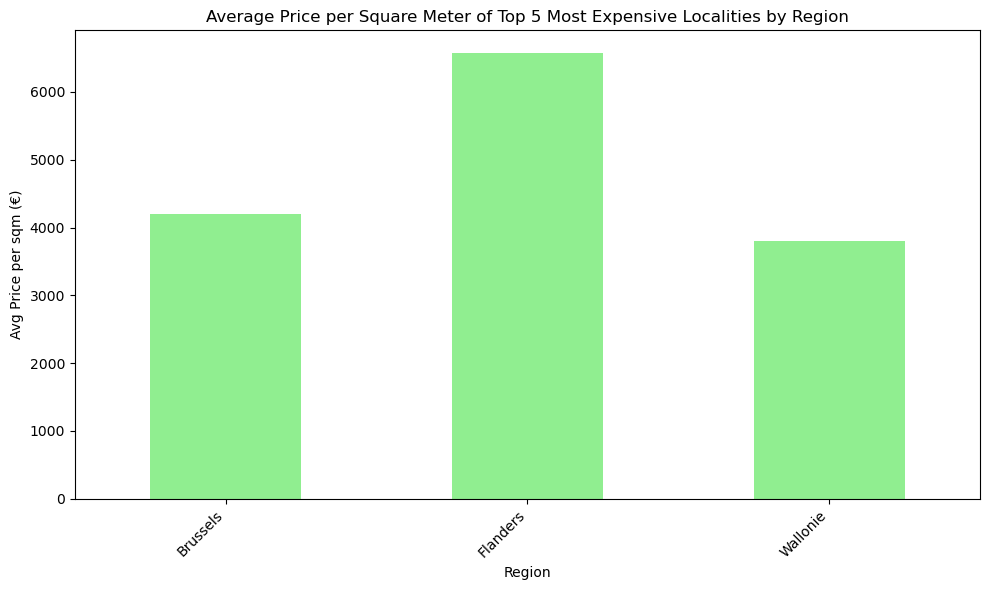

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming full_data is already loaded

# Clean and prepare the full_data
full_data['Price'] = pd.to_numeric(full_data['Price'], errors='coerce')
full_data['LivingArea'] = pd.to_numeric(full_data['LivingArea'], errors='coerce')

# Remove rows with missing or zero LivingArea or Price values
full_data_cleaned = full_data.dropna(subset=['Price', 'LivingArea'])
full_data_cleaned = full_data_cleaned[full_data_cleaned['LivingArea'] > 0]

# Calculate price per square meter
full_data_cleaned['Price_per_sqm'] = full_data_cleaned['Price'] / full_data_cleaned['LivingArea']

# Group by Region, Province, District, and Locality and calculate the required statistics
grouped_stats = full_data_cleaned.groupby(['Region', 'Province', 'District', 'Locality']).agg(
    Average_price=('Price', 'mean'),
    Median_price_per_sqm=('Price_per_sqm', 'median'),
    Average_price_per_sqm=('Price_per_sqm', 'mean'),
    Std_price=('Price', 'std'),
    Std_price_per_sqm=('Price_per_sqm', 'std')
).reset_index()

grouped_stats['Average_price'] = grouped_stats['Average_price'].round(0)
grouped_stats['Median_price_per_sqm'] = grouped_stats['Median_price_per_sqm'].round(0)
grouped_stats['Average_price_per_sqm'] = grouped_stats['Average_price_per_sqm'].round(0)

def get_top_localities_per_region(df, n=5):
    cheapest_localities = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    most_expensive_localities = df.groupby('Region').apply(lambda x: x.nlargest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    return cheapest_localities, most_expensive_localities

cheapest_localities, most_expensive_localities = get_top_localities_per_region(grouped_stats)

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=cheapest_localities[['Region', 'Locality', 'Average_price_per_sqm']].values, 
                 colLabels=['Region', 'Locality', 'Avg Price per sqm (€)'],
                 cellLoc='center', loc='center')
table.scale(1, 1.5)
plt.title('Top 5 Cheapest Localities by Region (Price per sqm)', fontsize=14)
plt.show()

# Plotting the top 5 most expensive localities table using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=most_expensive_localities[['Region', 'Locality', 'Average_price_per_sqm']].values, 
                 colLabels=['Region', 'Locality', 'Avg Price per sqm (€)'],
                 cellLoc='center', loc='center')
table.scale(1, 1.5)
plt.title('Top 5 Most Expensive Localities by Region (Price per sqm)', fontsize=14)
plt.show()

# Bar Chart for Cheapest Localities by Region
plt.figure(figsize=(10, 6))
cheapest_localities.groupby('Region')['Average_price_per_sqm'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Price per Square Meter of Top 5 Cheapest Localities by Region')
plt.ylabel('Avg Price per sqm (€)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Chart for Most Expensive Localities by Region
plt.figure(figsize=(10, 6))
most_expensive_localities.groupby('Region')['Average_price_per_sqm'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Price per Square Meter of Top 5 Most Expensive Localities by Region')
plt.ylabel('Avg Price per sqm (€)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_9828\2523166117.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cheapest_localities = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Average_price_per_sqm')).reset_index(drop=True)
C:\Users\Becode-son\AppData\Local\Temp\ipykernel_9828\2523166117.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_expensive_localities = df.groupby('Region').ap

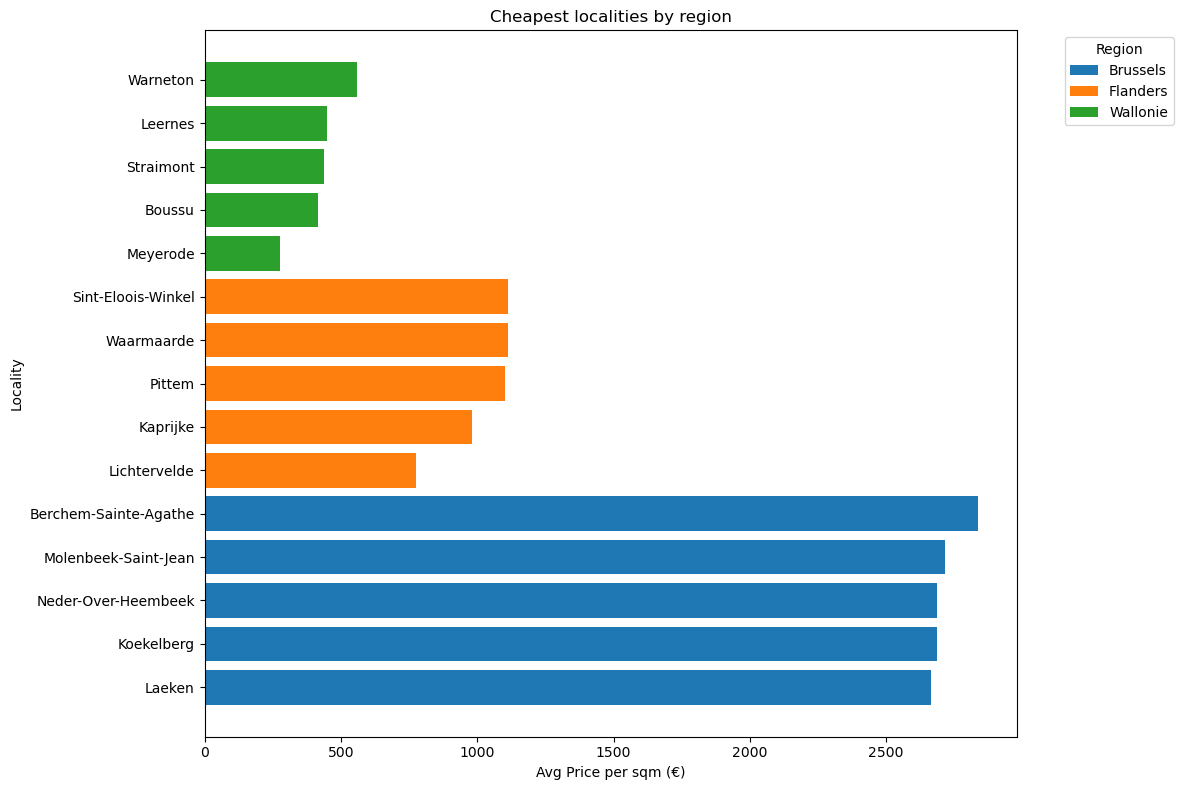

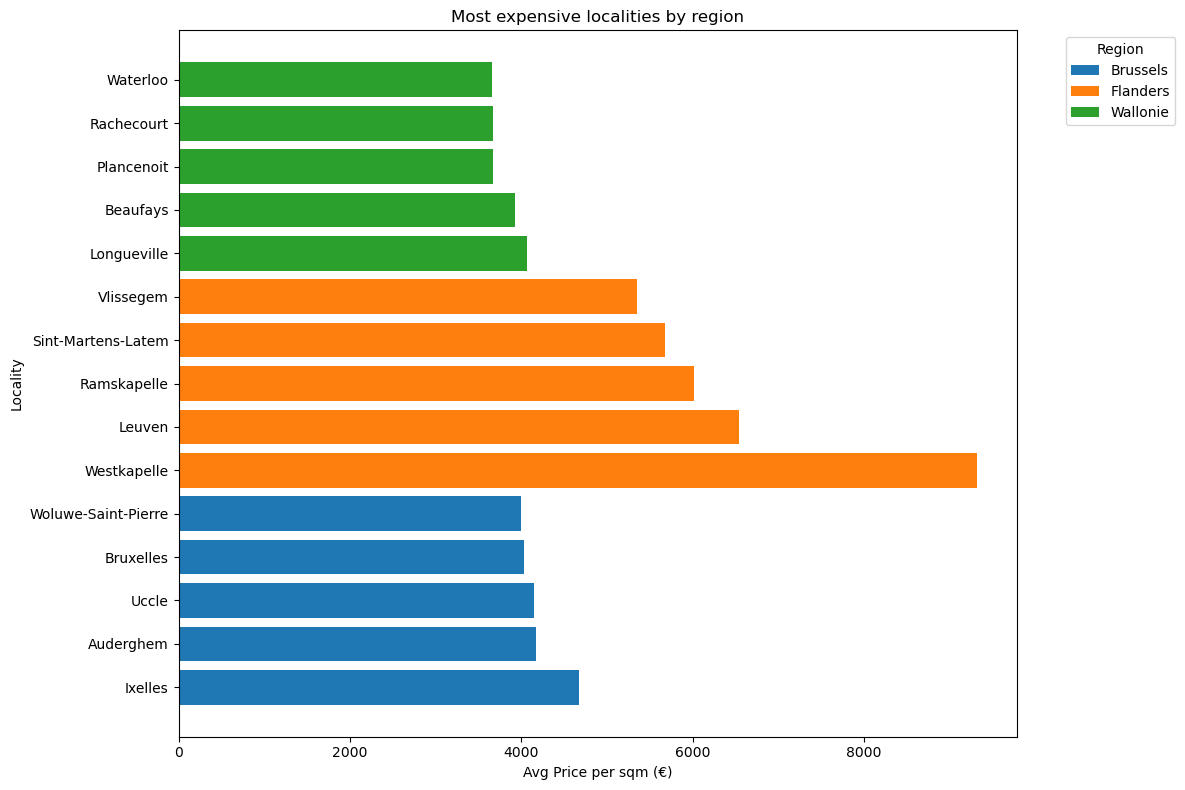

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming full_data is already loaded

# Clean and prepare the full_data
full_data['Price'] = pd.to_numeric(full_data['Price'], errors='coerce')
full_data['LivingArea'] = pd.to_numeric(full_data['LivingArea'], errors='coerce')

# Remove rows with missing or zero LivingArea or Price values (as price per sqm2 is baesed on LivingArea here)
full_data_cleaned = full_data.dropna(subset=['Price', 'LivingArea'])
full_data_cleaned = full_data_cleaned[full_data_cleaned['LivingArea'] > 0]

# Calculate price per sqm 
full_data_cleaned['Price_per_sqm'] = full_data_cleaned['Price'] / full_data_cleaned['LivingArea']

# Group by Region, Province, District, and Locality and  
grouped_stats = full_data_cleaned.groupby(['Region', 'Province', 'District', 'Locality']).agg(
    Average_price=('Price', 'mean'),
    Median_price_per_sqm=('Price_per_sqm', 'median'),
    Average_price_per_sqm=('Price_per_sqm', 'mean'),
    Std_price=('Price', 'std'),
    Std_price_per_sqm=('Price_per_sqm', 'std')
).reset_index()

# Round_up values 
grouped_stats['Average_price'] = grouped_stats['Average_price'].round(0)
grouped_stats['Median_price_per_sqm'] = grouped_stats['Median_price_per_sqm'].round(0)
grouped_stats['Average_price_per_sqm'] = grouped_stats['Average_price_per_sqm'].round(0)

# Sort by Average_price_per_sqm 
def get_top_localities_per_region(df, n=5):
    cheapest_localities = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    most_expensive_localities = df.groupby('Region').apply(lambda x: x.nlargest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    return cheapest_localities, most_expensive_localities

# Get top 5 cheapest and most expensive localities per region
cheapest_localities, most_expensive_localities = get_top_localities_per_region(grouped_stats)

# Bar Chart for Cheapest Localities by Region
plt.figure(figsize=(12, 8))
for region in cheapest_localities['Region'].unique():
    region_data = cheapest_localities[cheapest_localities['Region'] == region]
    plt.barh(region_data['Locality'], region_data['Average_price_per_sqm'], label=region)

plt.title('Cheapest localities by region')
plt.xlabel('Avg Price per sqm (€)')
plt.ylabel('Locality')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar Chart for Most Expensive Localities by Region
plt.figure(figsize=(12, 8))
for region in most_expensive_localities['Region'].unique():
    region_data = most_expensive_localities[most_expensive_localities['Region'] == region]
    plt.barh(region_data['Locality'], region_data['Average_price_per_sqm'], label=region)

plt.title('Most expensive localities by region')
plt.xlabel('Avg Price per sqm (€)')
plt.ylabel('Locality')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset
new_data = pd.read_csv('data_restructured_final_postcodes_up.csv')

# Clean and prepare the new_data
new_data['Price'] = pd.to_numeric(new_data['Price'], errors='coerce')
new_data['LivingArea'] = pd.to_numeric(new_data['LivingArea'], errors='coerce')

# Remove rows with missing or zero LivingArea or Price values
new_data_cleaned = new_data.dropna(subset=['Price', 'LivingArea'])
new_data_cleaned = new_data_cleaned[new_data_cleaned['LivingArea'] > 0]

# Calculate price per square meter
new_data_cleaned['Price_per_sqm'] = new_data_cleaned['Price'] / new_data_cleaned['LivingArea']

# Group by Region, Province, District, and Gemeente and calculate the required statistics
grouped_stats_new = new_data_cleaned.groupby(['Region', 'Province', 'District', 'Gemeente']).agg(
    Average_price=('Price', 'mean'),
    Median_price_per_sqm=('Price_per_sqm', 'median'),
    Average_price_per_sqm=('Price_per_sqm', 'mean'),
    Std_price=('Price', 'std'),
    Std_price_per_sqm=('Price_per_sqm', 'std')
).reset_index()

# Round the values for better readability
grouped_stats_new['Average_price'] = grouped_stats_new['Average_price'].round(0)
grouped_stats_new['Median_price_per_sqm'] = grouped_stats_new['Median_price_per_sqm'].round(0)
grouped_stats_new['Average_price_per_sqm'] = grouped_stats_new['Average_price_per_sqm'].round(0)

# Sort by Average_price_per_sqm to get top 5 cheapest and most expensive localities in each region
def get_top_localities_per_region(df, n=5):
    cheapest_localities = df.groupby('Region').apply(lambda x: x.nsmallest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    most_expensive_localities = df.groupby('Region').apply(lambda x: x.nlargest(n, 'Average_price_per_sqm')).reset_index(drop=True)
    return cheapest_localities, most_expensive_localities


cheapest_localities_new, most_expensive_localities_new = get_top_localities_per_region(grouped_stats_new)

# Bar Cheapest Localities by Region
plt.figure(figsize=(12, 8))
for region in cheapest_localities_new['Region'].unique():
    region_data = cheapest_localities_new[cheapest_localities_new['Region'] == region]
    plt.barh(region_data['Gemeente'], region_data['Average_price_per_sqm'], label=region)

plt.title('"Cheapest Localities in Belgium by region (€/sqm)')
plt.xlabel('Avg Price per sqm (€)')
plt.ylabel('Locality')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar Chart for Most Expensive Localities by Region
plt.figure(figsize=(12, 8))
for region in most_expensive_localities_new['Region'].unique():
    region_data = most_expensive_localities_new[most_expensive_localities_new['Region'] == region]
    plt.barh(region_data['Gemeente'], region_data['Average_price_per_sqm'], label=region)


plt.title('Most Expensive Localities in Belgium by region (€/sqm)')
plt.xlabel('Avg Price per sqm (€)')
plt.ylabel('Locality')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data_restructured_final_postcodes_up.csv'